### 构建逻辑回归分类器：以神经网络的思维方式

在2.1节中，我们提出猫咪识别的二分类问题。在本小节中，我们将通过神经网络的方法，学习如何构建一个逻辑回归分类器来识别猫咪。逻辑回归分类器是机器学习的经典工具之一，也是深度学习的基础。通过这个分类器的构建，你将掌握设计学习算法的通用框架，这为更复杂的模型打下坚实基础。

逻辑回归分类器的实现可以归纳为以下三个关键步骤：

1. **初始化参数**  
   任何机器学习算法的第一步都是初始化参数。在逻辑回归中，参数主要是权重向量 **w** 和偏置 **b**。合理的初始化可以为模型的训练提供良好的起点。

2. **计算成本函数及其梯度**  
   成本函数（也称为损失函数）是衡量模型预测与真实值之间差异的关键指标。在逻辑回归中，我们使用 **交叉熵损失函数**。此外，为了最小化成本函数，需要计算其 **梯度**，以指导参数更新的方向和幅度。

3. **使用优化算法（梯度下降）**  
   梯度下降是逻辑回归的核心优化算法。通过多次迭代地更新权重和偏置，使成本函数逐步降低，最终达到模型收敛。

在完成以上三个步骤的实现后，我们需要将它们整合到一个 **主函数** 中。这个主函数负责训练模型，并输出训练完成后的参数。通过这种模块化设计，你可以轻松扩展和调整逻辑回归分类器，适配不同的数据集和任务。

> 本节内容不仅教会你构建猫识别分类器，还为你理解和应用神经网络的基础架构提供了全面的指导。  
> 从这一刻起，你将迈向深度学习的世界！


## 1 - 导入所需的包 ##

首先，运行下面的代码单元，加载将会用到的所有库。

- [numpy](www.numpy.org)：Python 中进行科学计算的基础包。  
- [h5py](http://www.h5py.org)：用于读取存储在 H5 文件中的数据集的常用包。  
- [matplotlib](http://matplotlib.org)：Python 中著名的绘图库，用于绘制图形。  

In [2]:
# 导入 numpy 库，并将其简写为 np，主要用于数值计算，如数组和矩阵运算
import numpy as np

# 从 matplotlib 库中导入 pyplot 模块，并简写为 plt，用于绘图（如图像显示、函数曲线）
import matplotlib.pyplot as plt

# 导入 h5py 库，用于读取 .h5 格式的数据文件（常用于存储大型数据集）
import h5py

# 导入 scipy 科学计算库的主模块（本例中虽然导入了但未直接使用）
import scipy

# 从 PIL 库中导入 Image 类，用于图像的打开、处理和转换（如读取 JPG、PNG 图片）
from PIL import Image

# 从 scipy 库中导入 ndimage 模块，用于图像的数值处理（如旋转、滤波、变换等）
from scipy import ndimage

# 从本地模块 lr_utils 中导入 load_dataset 函数，用于加载逻辑回归所用的猫数据集
from lr_utils import load_dataset

# Jupyter 魔法命令，使 matplotlib 的图像能直接嵌入在 Notebook 中显示（而不是弹出新窗口）
%matplotlib inline


## 2 - 问题集概览 ##

**问题描述**：你将获得一个名为 `"data.h5"` 的数据集，其中包含：

- 一个训练集，包含 `m_train` 张图像，每张图像被标记为猫（y=1）或非猫（y=0）；
- 一个测试集，包含 `m_test` 张图像，也同样被标记为猫或非猫；
- 每张图像的形状为 `(num_px, num_px, 3)`，其中 `3` 代表三个通道（RGB）。因此，每张图像都是正方形，高度和宽度都为 `num_px`。

你的任务是构建一个简单的图像识别算法，能够正确地将图片分类为“猫”或“非猫”。

现在，让我们更深入地了解这个数据集。运行以下代码来加载数据：


In [3]:
# 加载数据集（猫/非猫图像）
# 调用自定义的 load_dataset() 函数，返回 5 个变量：
#train_set_x_orig   训练集图像数据，格式为 (m_train, num_px, num_px, 3)，为原始 RGB 图像
#train_set_y        训练集标签，格式为 (1, m_train)，值为 0（非猫）或 1（猫）
#test_set_x_orig    测试集图像数据，格式为 (m_test, num_px, num_px, 3)，为原始 RGB 图像
#test_set_y         测试集标签，格式为 (1, m_test)，值为 0 或 1
#classes = load_dataset()  类别名称，例如 [b'non-cat', b'cat']，表示标签对应的实际类别

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

我们在训练集和测试集的图像数据集名称后添加了 "_orig" 后缀，是因为接下来将对它们进行预处理。预处理完成后，我们将得到 `train_set_x` 和 `test_set_x`。  
（标签 `train_set_y` 和 `test_set_y` 不需要任何预处理。）

你的 `train_set_x_orig` 和 `test_set_x_orig` 中的每一行都是一个表示图像的数组。  
你可以通过运行下面的代码来可视化一个图像示例。你也可以自由更改 `index` 的值并重新运行，以查看其他图像。


y = [0], it's a 'non-cat' picture.


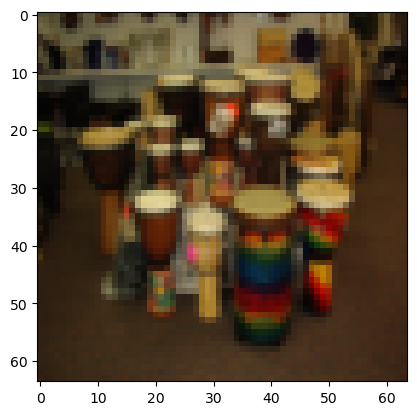

In [4]:
# 示例：显示一张训练集中第 index 张图片

index = 5  # 指定要查看的图片索引值（从训练集中选择第 5 张图片）

# 使用 matplotlib 的 imshow 函数将该图片可视化显示出来
plt.imshow(train_set_x_orig[index])

# 打印出对应的标签 y，以及标签所代表的类别名称（'cat' 或 'non-cat'）
# train_set_y[:, index]：从二维标签数组中取出第 index 个标签，仍是二维（1,1）形状；
# np.squeeze()：将形状 (1,1) 的数组压缩为标量；
# classes[...]：通过标签值（0 或 1）索引对应的类别名（如 b'cat'）；
# .decode("utf-8")：将字节类型转为字符串类型，便于打印为 'cat' 或 'non-cat'。
print(
    "y = " + str(train_set_y[:, index]) +                      # 输出标签值（0 或 1）
    ", it's a '" +                                             # 输出固定语句
    classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  # 将标签转换为类别名称并解码为字符串
    "' picture."                                               # 输出固定语句
)


在深度学习中，很多软件错误都源于矩阵或向量的维度不匹配。如果你能够始终搞清楚矩阵/向量的维度，那么就可以避免大量的 bug。

**练习：** 找出以下变量的值：
- `m_train`：训练样本数量
- `m_test`：测试样本数量
- `num_px`：训练图像的高度或宽度（图像是正方形的，因此高度 = 宽度 = num_px）

请记住，`train_set_x_orig` 是一个形状为 `(m_train, num_px, num_px, 3)` 的 numpy 数组。例如，你可以通过 `train_set_x_orig.shape[0]` 获取 `m_train` 的值。


In [5]:
# 获取训练集图像数量（样本数），即 m_train
m_train = train_set_x_orig.shape[0]   # train_set_x_orig 的第 0 维是训练样本数量

# 获取测试集图像数量（样本数），即 m_test
m_test = test_set_x_orig.shape[0]     # test_set_x_orig 的第 0 维是测试样本数量

# 获取图像的高度（或宽度），因为图像是正方形的
num_px = train_set_x_orig.shape[1]    # 第 1 维是图像的高度（像素数）

# 获取图像的宽度（其实与高度相等）
num_py = train_set_x_orig.shape[2]    # 第 2 维是图像的宽度（像素数）

# ------------------ 打印变量以检查数据形状 ------------------

# 打印训练集样本数量
print("训练集样本数量: m_train = " + str(m_train))

# 打印测试集样本数量
print("测试集样本数量: m_test = " + str(m_test))

# 打印图像的高度（像素数）
print("图像的高度（像素数）: num_px = " + str(num_px))

# 打印每张图像的完整形状（三维：高度、宽度、RGB通道）
print("每张图像的完整形状: (" + str(num_px) + ", " + str(num_py) + ", 3)")

# 打印训练集图像的整体形状（四维张量：样本数，高度，宽度，通道）
print("训练集图像的整体形状: " + str(train_set_x_orig.shape))

# 打印训练集标签的形状
print("训练集标签的形状: " + str(train_set_y.shape))

# 打印测试集图像的整体形状
print("测试集图像的整体形状: " + str(test_set_x_orig.shape))

# 打印测试集标签的形状
print("测试集标签的形状: " + str(test_set_y.shape))


训练集样本数量: m_train = 209
测试集样本数量: m_test = 50
图像的高度（像素数）: num_px = 64
每张图像的完整形状: (64, 64, 3)
训练集图像的整体形状: (209, 64, 64, 3)
训练集标签的形状: (1, 209)
测试集图像的整体形状: (50, 64, 64, 3)
测试集标签的形状: (1, 50)


为了后续操作的方便，现在你需要将图像从形状 `(num_px, num_px, 3)` 重塑为形状 `(num_px * num_px * 3, 1)` 的 numpy 数组。  
完成这一操作后，训练集（和测试集）就会变成一个 numpy 数组，其中每一列代表一张被拉平的图像。  
这个数组应该有 `m_train`（或 `m_test`）列。

**练习：**  
将训练集和测试集的数据进行重塑（reshape），使得每张原始大小为 `(num_px, num_px, 3)` 的图像被拉平成一个向量，其形状为 `(num_px * num_px * 3, 1)`。

💡 **提示技巧**：  
当你想把一个形状为 `(a, b, c, d)` 的矩阵 `X` 拉平成一个形状为 `(b * c * d, a)` 的矩阵 `X_flatten` 时，可以使用以下代码：

```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T 表示矩阵 X 的转置


In [6]:
# X_flatten = X.reshape(X.shape[0], -1).T 是通用的图像拉平方法
# reshape(X.shape[0], -1)：把每张图像展开成一行（保留样本数量维度）
# .T：对结果进行转置，使每一列对应一张图像，形状为 (num_px * num_px * 3, 样本数)

# 将训练集图像拉平成一维向量，并转置，使形状变为 (图像像素总数, 样本数)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T

# 将测试集图像也进行相同处理，得到 (图像像素总数, 样本数)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


# ------------------ 打印变量以检查数据形状 -----------------

# 打印训练集图像扁平化后的形状，应该是 (num_px * num_px * 3, m_train)
print("训练集图像扁平化后的形状: " + str(train_set_x_flatten.shape))

# 打印训练集标签的形状，应该是 (1, m_train)
print("训练集标签的形状: " + str(train_set_y.shape))

# 打印测试集图像扁平化后的形状，应该是 (num_px * num_px * 3, m_test)
print("测试集图像扁平化后的形状: " + str(test_set_x_flatten.shape))

# 打印测试集标签的形状，应该是 (1, m_test)
print("测试集标签的形状: " + str(test_set_y.shape))

# 拉平操作后的校验：查看训练集前5个像素的值（第0列代表第一张图片）
print("拉平操作后的校验: " + str(train_set_x_flatten[0:5, 0]))


训练集图像扁平化后的形状: (12288, 209)
训练集标签的形状: (1, 209)
测试集图像扁平化后的形状: (12288, 50)
测试集标签的形状: (1, 50)
拉平操作后的校验: [17 31 56 22 33]


### 图像数据标准化（Standardization）

为了表示彩色图像，每个像素必须包含红、绿、蓝（RGB）三个通道的值，因此每个像素的值实际上是一个包含三个数字的向量，这三个数字的取值范围是 0 到 255。

在机器学习中，一个常见的预处理步骤是对数据集进行居中和标准化。这意味着：  
你需要从每个样本中减去整个 NumPy 数组的平均值，然后将每个样本除以整个数组的标准差。

但是对于图像数据集来说，一个更简单、更方便且几乎同样有效的处理方法是：  
**将数据集中的每一行都除以 255（像素通道的最大值）**。

<!-- 
在模型训练的过程中，你将对初始输入进行加权和加偏置操作，从而得到神经元的激活值。然后你会使用梯度进行反向传播以训练模型。  
在这个过程中，非常重要的一点是：每个特征值应该具有相似的数值范围，以防止梯度爆炸。我们稍后在课程中会更详细地讲到这一点。
-->

让我们现在来对数据集进行标准化处理吧。


In [7]:
# 对训练集进行标准化处理：
# train_set_x_flatten 是一个形状为 (num_px*num_px*3, m_train) 的二维数组，
# 表示已经拉平成列向量并转置后的训练图像数据（每一列是一个样本）。
# 每个像素的值原本在 0~255 之间，我们将其除以 255，使其归一化到 0~1 之间，便于模型更好地学习。
# / 255. 中的 .0 是为了确保是浮点数除法，而不是整数除法。
# 标准化后的数据范围在 [0, 1]，这对神经网络训练非常关键，有助于避免梯度爆炸或消失的问题，加速收敛。
train_set_x = train_set_x_flatten / 255.

# 对测试集进行相同的标准化处理：
# test_set_x_flatten 是一个形状为 (num_px*num_px*3, m_test) 的二维数组，
# 每列代表一个测试样本的像素值向量，同样进行归一化处理。
test_set_x = test_set_x_flatten / 255.

In [8]:
# 降维之后的情况
print ("训练集降维后的维度: " + str(train_set_x_flatten.shape))
print ("训练集标签的维度: " + str(train_set_y.shape))
print ("测试集降维后的维度: " + str(test_set_x_flatten.shape))
print ("测试集标签的维度: " + str(test_set_y.shape))

训练集降维后的维度: (12288, 209)
训练集标签的维度: (1, 209)
测试集降维后的维度: (12288, 50)
测试集标签的维度: (1, 50)


<font color='blue'>

**你需要记住的要点：**
    

数据预处理的常见步骤包括：
- 确定问题的数据维度和形状（例如：`m_train`、`m_test`、`num_px` 等）
- 将数据集重塑（reshape），使得每个样本变成一个大小为 `(num_px * num_px * 3, 1)` 的向量
- 对数据进行“标准化”处理
</font>


## 3 - 学习算法的一般架构 ##

现在是设计一个简单算法来区分猫图像和非猫图像的时候了。

你将用神经网络的思维来构建一个逻辑回归模型。下图说明了为什么**逻辑回归其实是一个非常简单的神经网络！**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**算法的数学表达式**：

对于一个样本 $x^{(i)}$：
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

然后通过对所有训练样本求和来计算成本函数：
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**关键步骤**：  
在本练习中，你将完成以下步骤：  
- 初始化模型参数  
- 通过最小化成本函数学习模型参数  
- 使用学到的参数进行预测（在测试集上）  
- 分析结果并得出结论  


## 4 - 构建算法的各个部分 ##

构建神经网络的主要步骤是：  
1. 定义模型结构（例如输入特征的数量）  
2. 初始化模型参数  
3. 循环执行：  
    - 计算当前损失（前向传播）  
    - 计算当前梯度（反向传播）  
    - 更新参数（梯度下降）  

通常你会将步骤1-3分别实现，然后整合成一个我们称为 `model()` 的函数。

### 4.1 - 辅助函数

**练习**：使用你在“Python基础”中的代码，实现 `sigmoid()` 函数。正如上图所示，你需要计算  
$$sigmoid(w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$$  
来进行预测。请使用 `np.exp()` 实现。
 `np.exp()` 实现。


In [9]:
def sigmoid(z):
    """
    参数说明：
        z -- 输入值，可以是任意大小的标量或 numpy 数组。

    返回值：
        s -- 经过 sigmoid 函数计算后的结果，形状与 z 相同。
    """
    
    # 计算 sigmoid 函数的值，公式为：1 / (1 + e^(-z))
    # np.exp(-z) 计算 z 的相反数的指数值，支持数组元素逐个计算
    s = 1 / (1 + np.exp(-z))    
    
    # 返回计算结果 s，形状与输入 z 一致
    return s

In [10]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


### 4.2 - 初始化参数

**练习：** 在下面的代码单元中实现参数初始化。你需要将权重向量 `w` 初始化为全零向量。如果不清楚使用哪个 numpy 函数，可以查阅 Numpy 官方文档中的 `np.zeros()` 函数。


In [11]:
def initialize_with_zeros(dim):
    """
    此函数创建一个维度为 (dim, 1) 的全零向量 w，并将标量 b 初始化为 0。
    
    参数：
        dim -- 整数，表示我们希望 w 向量的大小（即参数个数）
    
    返回：
        w -- 维度为 (dim, 1) 的初始化零向量（权重参数）
        b -- 初始化为 0 的标量（偏置项）
    """

    # 使用 numpy 的 zeros 函数创建一个形状为 (dim, 1) 的全零二维数组
    w = np.zeros((dim, 1))  # 权重向量 w，形状为 (dim, 1)

    # 初始化偏置 b 为 0（标量）
    b = 0

    # 断言：确保 w 的形状正确为 (dim, 1)，用于调试验证
    assert(w.shape == (dim, 1))

    # 断言：确保 b 是一个 float 或 int 类型的标量
    assert(isinstance(b, float) or isinstance(b, int))
    
    # 返回初始化后的 w 和 b
    return w, b


In [12]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0



</table>

对于图像输入，w 的形状将是：  
$(\text{num\_px} \times \text{num\_px} \times 3,\ 1)$  
其中，`num_px` 表示图像的边长像素数，3 表示 RGB 三个通道。


### 4.3 - 前向传播与反向传播

现在你的参数已经初始化完成，可以开始执行“前向传播”和“反向传播”步骤来学习这些参数。

**练习：** 实现一个名为 `propagate()` 的函数，用于计算代价函数（Cost Function）及其梯度（Gradients）。

---

**提示：**

#### 🧮 前向传播（Forward Propagation）：
- 输入：训练数据 $X$
- 计算激活值 $A = \sigma(w^T X + b)$  
  得到：$A = (a^{(0)}, a^{(1)}, ..., a^{(m)})$
- 使用交叉熵损失函数计算成本（Cost）：  
  $$J = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(a^{(i)}) + (1 - y^{(i)}) \log(1 - a^{(i)}) \right]$$

---

#### 🔁 反向传播（Backward Propagation）：
用于计算损失函数对参数的偏导数：

- 权重的梯度（dw）：
  $$
  \frac{\partial J}{\partial w} = \frac{1}{m} X (A - Y)^T \tag{7}
  $$

- 偏置的梯度（db）：
  $$
  \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (a^{(i)} - y^{(i)}) \tag{8}
  $$

这些导数将用于后续的梯度下降步骤来更新参数。


In [13]:
def propagate(w, b, X, Y):
    """
    实现前向传播和反向传播，用于计算逻辑回归的代价函数及其梯度

    参数：
        w -- 权重参数，维度为 (num_px * num_px * 3, 1)
        b -- 偏置参数，标量
        X -- 输入数据，维度为 (num_px * num_px * 3, 样本数 m)
        Y -- 真实标签向量，维度为 (1, 样本数 m)，非猫为0，猫为1

    返回：
        cost -- 逻辑回归的负对数似然代价（scalar）
        dw -- 相对于权重 w 的导数，形状与 w 相同
        db -- 相对于偏置 b 的导数，标量
    """

    # 获取样本数量 m（即训练集中的样本个数）
    m = X.shape[1]

    # === 前向传播 ===
    # 计算线性部分 z = w^T X + b，然后通过 sigmoid 得到预测概率 A
    A = sigmoid(np.dot(w.T, X) + b)

    # 计算逻辑回归的成本函数（交叉熵损失）
    cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # === 反向传播 ===
    # 计算关于 w 的梯度 dw：dw = (1/m) * X * (A - Y)^T
    # .T 是为了把 (A - Y) 从 (1, m) 转成 (m, 1)，这样才能与 X (n, m) 做矩阵乘法，得到 dw (n, 1)。
    dw = 1 / m * np.dot(X, (A - Y).T)

    # 计算关于 b 的梯度 db：db = (1/m) * ∑(A - Y)
    db = 1 / m * np.sum(A - Y)

    # 验证 dw 的形状是否与 w 相同（用于调试）
    assert(dw.shape == w.shape)

    # 验证 db 是 float 类型（标量）
    assert(db.dtype == float)

    # 去除 cost 的维度，将其转化为纯标量（例如从 array([17.0]) 变成 17.0）
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    # 将导数封装到字典 grads 中，便于后续使用
    grads = {"dw": dw,
             "db": db}

    # 返回导数和成本
    return grads, cost


In [14]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


### 4.4 优化（Optimization）

- 你已经初始化了模型参数 `w` 和 `b`；
- 你也已经可以计算代价函数（cost function）以及它的梯度；
- 现在，你要使用**梯度下降法（Gradient Descent）**来更新参数。

---

**练习：** 请编写一个优化函数 `optimize()`，目标是通过最小化代价函数 $J$ 来学习参数 $w$ 和 $b$。

---

在梯度下降中，对于任意参数 $\theta$，其更新公式如下：

$$
\theta = \theta - \alpha \cdot d\theta
$$

其中：

- $\theta$ 表示当前的参数（例如 $w$ 或 $b$）
- $d\theta$ 是该参数的梯度（例如 $dw$ 或 $db$）
- $\alpha$ 是学习率（learning rate），控制步长

---

你需要在 `optimize()` 中完成的步骤包括：

1. 使用前面实现的 `propagate()` 函数来计算当前的 cost 和梯度（`dw`, `db`）；
2. 根据公式更新参数：
   - $w = w - \alpha \cdot dw$
   - $b = b - \alpha \cdot db$
3. 将每次迭代的 cost 保存下来，便于后续分析训练过程；
4. 最后返回更新后的参数、梯度字典、以及 cost 变化列表。

准备好之后，你就可以训练你的分类器了 🚀


In [15]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    此函数通过运行梯度下降算法来优化 w 和 b 参数。

    参数：
        w -- 权重参数，维度为 (num_px * num_px * 3, 1)
        b -- 偏置参数，标量
        X -- 输入数据，维度为 (num_px * num_px * 3, 样本数)
        Y -- 标签向量，维度为 (1, 样本数)，猫为1，非猫为0
        num_iterations -- 梯度下降的迭代次数
        learning_rate -- 学习率 α，用于参数更新
        print_cost -- 如果为 True，每100次迭代打印一次代价

    返回：
        params -- 字典，包含更新后的权重 w 和偏置 b
        grads -- 字典，包含 w 和 b 对应的梯度 dw 和 db
        costs -- 迭代过程中每100次记录一次的代价值列表，可用于绘制学习曲线
    """
    
    # 创建一个空列表，用于存储每100次迭代的 cost 值
    costs = []
    
    # 进行 num_iterations 次迭代
    for i in range(num_iterations):
        
        # === 第1步：前向传播 + 反向传播，计算 cost 和梯度 ===
        grads, cost = propagate(w, b, X, Y)
        
        # 从梯度字典中取出导数值
        dw = grads["dw"]
        db = grads["db"]
        
        # === 第2步：使用梯度下降规则更新参数 ===
        # 更新权重 w
        w = w - learning_rate * dw
        # 更新偏置 b
        b = b - learning_rate * db
        
        # 每100次保存一次当前代价函数值
        if i % 100 == 0:
            costs.append(cost)
        
        # 如果设置了 print_cost=True，每100次输出一次当前代价
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    
    # 将最终更新后的 w 和 b 打包到字典中
    params = {"w": w,
              "b": b}
    
    # 同样，将最终的梯度打包到字典中
    grads = {"dw": dw,
             "db": db}
    
    # 返回参数字典、梯度字典、以及所有保存的 cost 值
    return params, grads, costs


In [16]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print(costs)

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828
[6.000064773192205]


### 🧪 练习：实现预测函数 `predict()`

你已经有了训练完成的参数 `w` 和 `b`，接下来我们要实现预测步骤。

---

我们要使用训练得到的参数对一个输入数据集 `X` 进行预测，步骤如下：

---

### 🧮 步骤 1：前向传播，计算预测概率

$$
\hat{Y} = A = \sigma(w^T X + b)
$$

其中：
- $X$ 的维度是 `(n, m)`，即每列是一个输入样本；
- $w^T X + b$ 的输出是预测概率（每个样本属于“猫”的概率）；
- 记为 `A`

---

### 🔢 步骤 2：将激活值 `A` 转换为类别标签 0 或 1

- 如果 $a^{(i)} > 0.5$，预测为 1（是猫）；
- 如果 $a^{(i)} \leq 0.5$，预测为 0（不是猫）；

你可以选择使用：
- `for` 循环 + `if/else` 判断（简单易懂）
- 或者使用 numpy 的**向量化写法**（效率更高）

---

### 🧾 输出要求：

你要返回一个预测向量 `Y_prediction`，形状为 `(1, m)`，其中每一列都是样本的预测标签（0 或 1）。


In [17]:
def predict(w, b, X):  
    """
    使用学习逻辑回归参数 logistic(w, b) 预测标签是 0 还是 1。

    参数说明：
        w -- 权重参数，ndarray 类型，形状为 (num_px * num_px * 3, 1)
        b -- 偏置参数，float 类型，一个标量
        X -- 输入数据，ndarray 类型，形状为 (num_px * num_px * 3, m)，
             其中 m 是样本（图片）数量，每一列是一个拉平后的图片

    返回值：
        Y_prediction -- 预测结果，ndarray 类型，形状为 (1, m)，
                        每个元素为 0 或 1，表示是否预测为猫
    """
    
    # 获取样本数量 m（即 X 的列数）
    m = X.shape[1]
    
    # 初始化预测结果向量，形状为 (1, m)，初始全部为 0
    Y_prediction = np.zeros((1, m))
    
    # 将 w 重塑为二维列向量，形状为 (X.shape[0], 1)，确保矩阵乘法兼容
    w = w.reshape(X.shape[0], 1)
    
    # 计算每个样本的预测概率 A，公式为 A = sigmoid(w^T * X + b)
    # np.dot(w.T, X) 的结果形状是 (1, m)，然后加上标量 b（广播）
    A = sigmoid(np.dot(w.T, X) + b)

    # 遍历每个样本的预测概率，进行二值分类判断
    for i in range(A.shape[1]):
        # 如果概率小于等于 0.5，预测为 0（非猫）
        if A[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        # 如果概率大于 0.5，预测为 1（猫）
        else:
            Y_prediction[0, i] = 1
        # 为什么写 A[0, i] 而不是 A[i]
        # 因为 A 是一个二维数组（形状是 (1, m)），即使它只有一行，它仍然是二维的。
        # 你不能直接用 A[i] 来取第 i 个样本的预测值，因为：
        # A[i] 是行索引；
        # A[0, i] 才是第 0 行、第 i 列，也就是第 i 个样本的预测概率。
            
    # 断言输出预测向量的形状是否为 (1, m)，确保返回值符合预期
    assert(Y_prediction.shape == (1, m))
    
    # 返回预测结果向量
    return Y_prediction


In [18]:
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


<font color='blue'> **请记住：** 你已经实现了多个函数，它们的作用是： - 初始化参数 \( (w, b) \) - 通过迭代优化损失函数来学习参数 \( (w, b) \)： - 计算代价函数及其梯度 - 使用梯度下降法更新参数 - 使用学习到的 \( (w, b) \) 对给定的数据集进行标签预测 </font>

## 5 - 合并所有函数为一个模型 ##

你现在将看到整个模型的结构方式：通过将之前实现的所有构建模块（函数）按正确的顺序组合在一起。

**练习题：** 实现一个 `model` 函数。请使用以下命名方式：
- `Y_prediction`：表示对测试集的预测结果  
- `Y_prediction_train`：表示对训练集的预测结果  
- `w`, `costs`, `grads`：表示 `optimize()` 函数的输出结果  


In [19]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):    
    """
    通过调用之前实现的函数来构建逻辑回归模型

    参数：
        X_train  - numpy数组，形状为（num_px * num_px * 3, m_train），训练集特征
        Y_train  - numpy数组，形状为（1, m_train），训练集标签
        X_test   - numpy数组，形状为（num_px * num_px * 3, m_test），测试集特征
        Y_test   - numpy数组，形状为（1, m_test），测试集标签
        num_iterations  - 用于梯度下降优化的迭代次数（超参数）
        learning_rate   - 学习率，控制梯度下降每步更新的幅度（超参数）
        print_cost      - 是否每100次迭代打印一次损失函数值，布尔值

    返回：
        d  - 包含模型的参数和预测结果等信息的字典
    """

    # 初始化权重w和偏置b为0，w的维度与特征数相同
    w, b = initialize_with_zeros(X_train.shape[0])

    # 使用训练集进行梯度下降，优化参数w和b
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # 从返回的字典中提取优化后的w和b
    w = parameters["w"]
    b = parameters["b"]

    # 使用学习到的参数对测试集和训练集进行预测
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # 打印训练集和测试集的准确率（预测值与真实值的差的绝对值的平均）
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    # 将所有输出结果打包成一个字典返回
    d = {
        "costs": costs,                            # 训练过程中记录的损失值列表
        "Y_prediction_test": Y_prediction_test,    # 对测试集的预测结果
        "Y_prediction_train": Y_prediction_train,  # 对训练集的预测结果
        "w": w,                                     # 最终训练得到的权重参数
        "b": b,                                     # 最终训练得到的偏置参数
        "learning_rate": learning_rate,             # 使用的学习率
        "num_iterations": num_iterations            # 使用的迭代次数
    }

    return d

运行下面的代码单元来训练你的模型。

In [20]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**注释**：训练准确率接近 100%。这是一个很好的合理性检查，说明你的模型正常工作且具有足够的能力拟合训练数据。测试误差为 68%。考虑到我们使用的是小型数据集且逻辑回归是线性分类器，对于这个简单模型来说，这个结果其实还不错。但别担心，你将构建一个更优秀的分类器！

另外，你会看到模型明显过拟合了训练数据专业后续课程中，你将学习如何减少过拟合，例如使用正则化。你可以使用下面的代码（并修改 `index` 变量）查看测试集中某张图片的预测结果。


y = 1, 你预测它是一个 "cat" 图片。


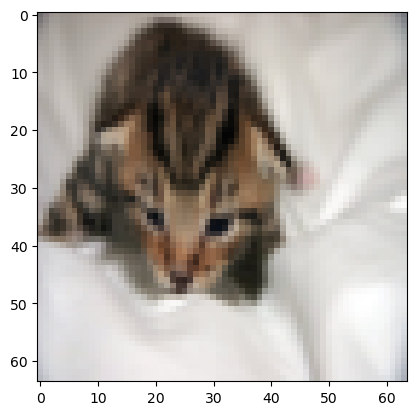

In [21]:
# 错误分类的图片示例
index = 1  # 设置要查看的图片索引

# 显示图片，reshape回原始尺寸 (num_px, num_px, 3)
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))

# 打印真实标签和预测标签
print("y = " + str(test_set_y[0, index]) + 
      ", 你预测它是一个 \"" + classes[int(d["Y_prediction_test"][0, index])].decode("utf-8") + "\" 图片。")


接下来绘制损失函数和梯度的变化曲线。

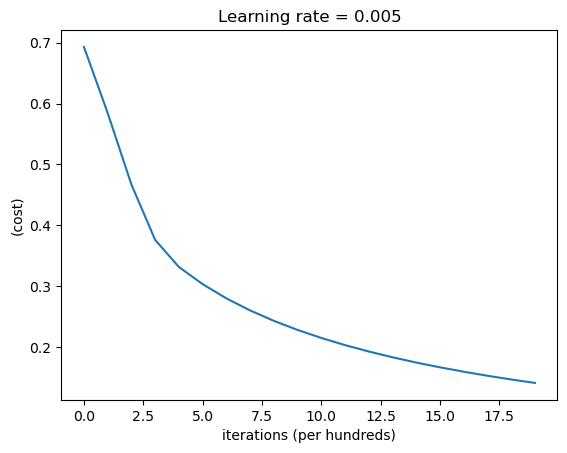

In [22]:
# 绘制学习曲线（基于成本函数）
costs = np.squeeze(d['costs'])  # 将成本数组降维，变成一维数组
plt.plot(costs)                 # 绘制成本随迭代次数的变化曲线
plt.ylabel('(cost)')        # y轴标签
plt.xlabel('iterations (per hundreds)')  # x轴标签
plt.title("Learning rate = " + str(d["learning_rate"]))  # 标题，显示学习率
plt.show()                      # 显示图形


**解读**：  
你可以看到成本在不断下降，这表明模型参数正在被有效学习。然而，你也会发现可以通过增加迭代次数来进一步训练模型。试着将上面代码单元中的迭代次数增加，然后重新运行相关代码。你可能会看到训练集的准确率提高，但测试集的准确率下降，这种现象称为过拟合。


## 6 - 进一步分析 ##

恭喜你完成了第一个图像分类模型的构建。接下来我们对它进行更深入的分析，并探讨学习率 $\alpha$ 的可能选择。


#### 学习率的选择 ####

**提醒**：  
为了使梯度下降法有效，你必须明智地选择学习率。学习率 $\alpha$ 决定了参数更新的速度。  
如果学习率过大，可能会导致“超调”最优值；同样，如果学习率过小，则需要太多的迭代次数才能收敛到最佳值。  
这就是为什么使用一个调优良好的学习率非常关键。

下面我们来比较模型在不同学习率下的学习曲线。运行下面的代码单元，耗时大约1分钟。  
你也可以尝试不同于初始化时 `learning_rates` 变量中三个值的其它学习率，看看结果会怎样。


learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



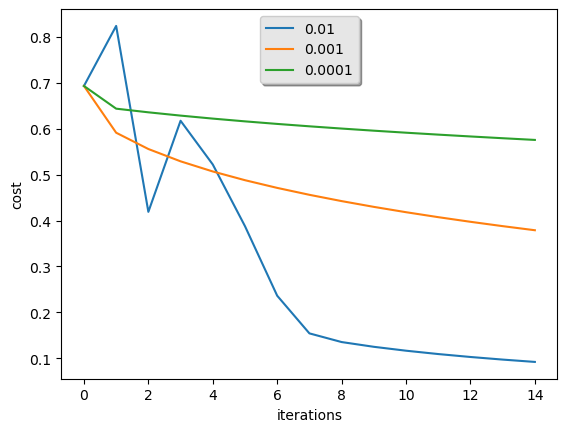

In [23]:
learning_rates = [0.01, 0.001, 0.0001]  # 定义一个列表，包含3个不同的学习率值

models = {}  # 创建一个空字典，用于存储不同学习率对应的训练模型结果

for i in learning_rates:  # 遍历每一个学习率
    print("learning rate is: " + str(i))  # 输出当前的学习率，方便观察

    # 调用 model 函数训练模型
    # 参数说明：
    # train_set_x -- 训练集特征数据
    # train_set_y -- 训练集标签
    # test_set_x -- 测试集特征数据
    # test_set_y -- 测试集标签
    # num_iterations=1500 -- 训练迭代次数设为1500
    # learning_rate=i -- 当前循环的学习率
    # print_cost=False -- 不打印训练过程中的成本信息
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y,
                          num_iterations=1500,
                          learning_rate=i,
                          print_cost=False)

    print('\n' + "-------------------------------------------------------" + '\n')  # 输出分割线，便于区分不同学习率的训练结果

# 画图部分：遍历所有学习率，画出对应模型的成本曲线
for i in learning_rates:
    # np.squeeze 用于去除多余的维度，models[str(i)]["costs"] 是训练过程中记录的成本列表
    # label 参数为图例标签，显示当前学习率
    plt.plot(np.squeeze(models[str(i)]["costs"]), label=str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')       # 设置y轴标签为 cost（成本）
plt.xlabel('iterations') # 设置x轴标签为 iterations（迭代次数）

# 设置图例显示位置为上方中央，添加阴影
legend = plt.legend(loc='upper center', shadow=True)

frame = legend.get_frame()  # 获取图例的边框属性
frame.set_facecolor('0.90') # 设置图例背景颜色为灰白色（亮度0.90）

plt.show()  # 显示绘制好的图形


**解读**：  
- 不同的学习率会导致不同的成本（cost）和不同的预测结果。  
- 如果学习率过大（如0.01），成本可能会出现上下波动，甚至可能发散（不过在本例中，使用0.01的学习率最终仍能收敛到较好的成本值）。  
- 更低的成本不一定意味着模型更好，你还需要检查是否存在过拟合的情况。过拟合表现为训练集准确率远高于测试集准确率。  
- 在深度学习中，我们通常建议：  
    - 选择能够更好地最小化成本函数的学习率。  
    - 如果模型出现过拟合，采用其他技术来减少过拟合。内容会在后续视频中讲解。）  


<font color='blue'>  
  
**要点回顾：**  
    
1. 对数据集进行预处理非常重要。  
2. 你分别实现了各个函数：initialize()、propagate()、optimize()，然后构建了一个完整的 model()。  
3. 调整学习率（作为一种“超参数”）对算法效果影响很大。你将在后续看到更多此类示例！  
</font>

参考文献：  
- [Implementing a Neural Network from Scratch - WildML](http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/)  
- [Why do we normalize images by subtracting the dataset’s image mean and not the class mean? - Stats Stack Exchange](https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c)  
